# Hypothesis Testing Practice

In this notebook we will practice running hypothesis tests, and interpreting the results.

Specifically, we will

* Import the necessary python packages
* Read in a csv file using pandas
* Drop observations from a dataset
* Isolate two subsets of data in a pandas dataframe
* Write the hypotheses for a hypothesis test
* Calculate the t statistic and p value for the two groups (mostly) from scratch
* Interpret the results
* Run a ttest with the `scipy.stats` module

## Import the necessary python packages

First let's import the packages we will need. In the cell below, import:

1. pandas using the standard alias
2. numpy using the standard alias
3. The scipy stats module
4. The pyplot module from matplotlib

In [ ]:
# Your code here

In [3]:
#__SOLUTION__
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Read in a csv file using pandas

For our first hypothesis test we will use data on oral health that was collected by the [National Health and Nutrition Examination Survey](https://www.cdc.gov/nchs/nhanes/about_nhanes.htm). 

The data is stored in the filename `nhanes_oral_health.csv` within the `data/` directory of this repository. 

In the cell below
* Read in the csv file.
* Store the loaded data in the variable `dental`

In [ ]:
# Your code here

In [4]:
#__SOLUTION__
dental = pd.read_csv('data/nhanes_oral_health.csv')

In [5]:
dental.head()

,SEQN,Gender,Age in years at screening,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Country of birth,When did you last visit a dentist,Rate the health of your teeth and gums,# times you brush your teeth in 1 day?
0,109264.0,Female,13.0,1.0,Mexican American,USA,6 months or less,Good,2.0
1,109268.0,Female,18.0,3.0,Non-Hispanic White,USA,"More than 6 months, but not more than 1 year ago",Very good,1.0
2,109270.0,Female,11.0,4.0,Non-Hispanic Black,USA,6 months or less,Excellent,2.0
3,109275.0,Male,6.0,3.0,Non-Hispanic White,USA,6 months or less,Excellent,2.0
4,109277.0,Female,12.0,1.0,Mexican American,USA,6 months or less,Fair,2.0


In [6]:
#__SOLUTUION__
dental.head()

,SEQN,Gender,Age in years at screening,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Country of birth,When did you last visit a dentist,Rate the health of your teeth and gums,# times you brush your teeth in 1 day?
0,109264.0,Female,13.0,1.0,Mexican American,USA,6 months or less,Good,2.0
1,109268.0,Female,18.0,3.0,Non-Hispanic White,USA,"More than 6 months, but not more than 1 year ago",Very good,1.0
2,109270.0,Female,11.0,4.0,Non-Hispanic Black,USA,6 months or less,Excellent,2.0
3,109275.0,Male,6.0,3.0,Non-Hispanic White,USA,6 months or less,Excellent,2.0
4,109277.0,Female,12.0,1.0,Mexican American,USA,6 months or less,Fair,2.0


## Drop observations from a dataset

The colums of interest for our first Hypothesis test will be `Gender` and `# times you brush your teeth in 1 day?`.

In the cell below, plot a histrogram for the `# times you brush your teeth in 1 day?` column.

<AxesSubplot:>

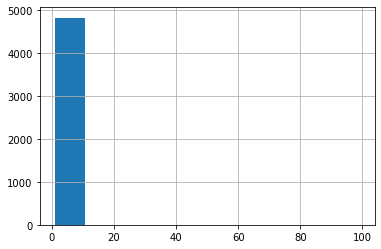

In [7]:
dental.iloc[:,-1].hist()

The data in this column appears to have some outliers near 100. If we reference the [Data Dictionary](https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_OHQ.htm#OHQ848Q), we can see that values greater than 9 represent either Null values or individuals who responded with "Don't know". In the cell below, drop rows where `# times you brush your teeth in 1 day?` is greater than 9.

In [8]:
# Your code here

In [9]:
#__SOLUTION__
dental = dental[dental['# times you brush your teeth in 1 day?'] <= 9]

In the cell below, replot the histrogram for `# times you brush your teeth in 1 day?`.

In [10]:
# Your code here

<AxesSubplot:>

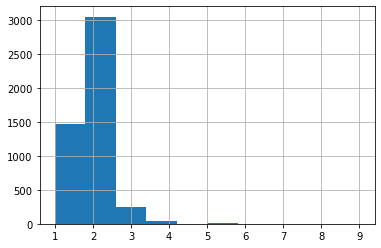

In [11]:
#__SOLUTION__
dental['# times you brush your teeth in 1 day?'].hist()

## Isolate two subsets of data in a pandas dataframe

For our first test, we will compare the number of times an individual brushes their teeth according to their gender. 

In the cell below,

* Isolate the `# times you brush your teeth in 1 day?` data for individuals who have a gender of `Male` and `Female`.
* Store the `Male` data in a variable called `male_brush` and the `Female` data in a variable called `female_brush`.

In [12]:
# Your code here

In [83]:
#__SOLUTION__
male_brush = dental[dental.Gender == 'Male']['# times you brush your teeth in 1 day?']
female_brush = dental[dental.Gender == 'Female']['# times you brush your teeth in 1 day?']

In the cell below, plot the means for `male_brush` and `female_brush` as a bar plot.

In [14]:
# Your code here

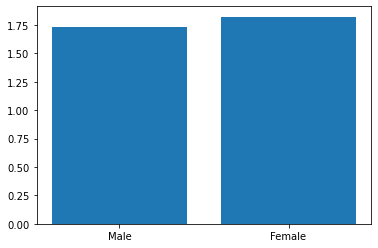

In [84]:
#__SOLUTION__
plt.bar(['Male', 'Female'], [male_brush.mean(), female_brush.mean()]);

## Write the hypotheses for a hypothesis test

Looking at the visualization above, individuals with a gender of female appear to brush their teeth more times a day on average than individuals with a gender of male. Is this difference significant?

In the cell below, 

* Identify whether a t-test for this question would be a one tail or two tail test.
* Write the Null and Alternative Hypotheses. 

YOUR ANSWER HERE

## Calculate the t statistic and p value for the two groups (mostly) from scratch

In this section, we will write two functions. 

- `ttest_s`
    - This function should receive two arguments:
        1. samp1
            - A pandas series or numpy array containing the data for a sample
        2. samp2
            - A pandas series or numpy array containing the data for a sample
    - This function should return:
        - The `s` variable used in the ttest formula

<br>  

- `ttest`
    - This function should receive two arguments:
        1. samp1
            - A pandas series or numpy array containing the data for a sample
        2. samp2
            - A pandas series or numpy array containing the data for a sample
    - This function should return:
        - A tuple with the following format `(t statistic, p value)`
            
        
**Below is the formula for a two sample, independent t-test. This visual leaves out the *degrees of freedom* that is required for calculating the pvalue.**

For this ttest:

$degrees\space of\space freedom=SampleSize_1 + SampleSize_2 - 2$


![](https://lh3.googleusercontent.com/proxy/BjvPty-ZDJcOBdjm5Neb53ToqHXoTPHcmEQJJA8h5Hh2nyOGEKxv5q0RrEvhQWWd3H_y3xfT3MQYZx0xlhesYxGVA-vbbLQbOWRMq-sR7JTbgGTruPa1EdmQiAnCavQm6PfNC9c3bQXiHww_)

**Please complete the functions below. Comments have been provided to guide you through each step.**

In [19]:
def ttest_s(samp1, samp2):
    # Subtract the mean from each observation in samp1
    # Store these differences in a variable called `samp1_diff`
    
    ######### YOUR CODE HERE #########
        
    # Subtract the mean from each observation in samp2
    # Store these differences in a variable called `samp2_diff`
    
    ######### YOUR CODE HERE #########

    # Raise samp1_diff to the second power
    # Store the result in the variable samp1_diff_sq
    
    ######### YOUR CODE HERE #########

    # Raise samp2_diff to the second power
    # Store the result in the variable samp2_diff_sq   
    
    ######### YOUR CODE HERE #########

    # Find the sum of samp1_diff_sq and samp2_diff_sq
    # Store the result in a variable called numerator
    
    ######### YOUR CODE HERE #########

    # Add the sample size of both samples together and subtract two
    # Store the result in a variable called denominator
    
    ######### YOUR CODE HERE #########

    # Divide the numerator and denominator
    # Store the result in a variable called s
    
    ######### YOUR CODE HERE #########

    # Return s
    
    ######### YOUR CODE HERE #########
    pass

In [18]:
def ttest(samp1, samp2):
    # Calculate the size of samp1
    # Store the result in a variable called n1

    ######### YOUR CODE HERE #########
    
    # Calculate the size of samp2
    # Store the result in a variable called n2
    
    ######### YOUR CODE HERE #########
    
    # Find the sum of n1 and n2. Then subtract 2
    # Store the result in a variable called df

    ######### YOUR CODE HERE #########
    
    # Use the ttest_s function
    # Store the output in a variable called s

    ######### YOUR CODE HERE #########
    
    # Find the difference between the means of the two samples
    # Store the result in a variable called numerator

    ######### YOUR CODE HERE #########
    
    # Divide 1 by both sample sizes and add them together.
    # Multiply the result by s and find the square root
    # Store the result in a variable called denominator

    ######### YOUR CODE HERE #########
    
    # Divide the numerator and denominator
    # Store the result in a variable called t

    ######### YOUR CODE HERE #########
    
    # Calculate the absolute value of t
    # Store the result in a variable called t_abs

    ######### YOUR CODE HERE #########
    
    # Find the one sided p value by using stats.t.sf
    # By passing in t_abs and df
    # Store the result in a variable called p_oneside
    
    ######### YOUR CODE HERE #########
    
    # Multiply p_oneside by 2
    
    ######### YOUR CODE HERE ######### 
    
    # Store the result in a variable called p
    # Return t and p

    ######### YOUR CODE HERE #########

In [69]:
#__SOLUTION__
def ttest_s(samp1, samp2):
    # Subtract the mean from each observation in samp1
    # Store these differences in a variable called `samp1_diff`
    samp1_diff = samp1 - samp1.mean()
    # Subtract the mean from each observation in samp2
    # Store these differences in a variable called `samp2_diff`
    samp2_diff = samp2 - samp2.mean()
    # Raise samp1_diff to the second power
    # Store the result in the variable samp1_diff_sq
    samp1_diff_sq = (samp1_diff ** 2).sum()
    # Raise samp2_diff to the second power
    # Store the result in the variable samp2_diff_sq   
    samp2_diff_sq = (samp2_diff ** 2  ).sum()
    # Find the sum of samp1_diff_sq and samp2_diff_sq
    # Store the result in a variable called numerator
    numerator = (samp1_diff_sq + samp2_diff_sq)
    # Add the sample size of both samples together and subtract two
    # Store the result in a variable called denominator
    denominator = samp1.shape[0] + samp2.shape[0] - 2
    # Divide the numerator and denominator
    # Store the result in a variable called s
    s = numerator/denominator
    # Return s
    return s

def ttest(samp1, samp2):
    # Calculate the size of samp1
    # Store the result in a variable called n1
    n1 = samp1.shape[0]
    # Calculate the size of samp2
    # Store the result in a variable called n2
    n2 = samp2.shape[0]
    # Find the sum of n1 and n2. Then subtract 2
    # Store the result in a variable called df
    df = n1 + n2 - 2
    # Use the ttest_s function
    # Store the output in a variable called s
    s = ttest_s(samp1, samp2)
    # Find the difference between the means of the two samples
    # Store the result in a variable called numerator
    numerator = samp1.mean() - samp2.mean()
    # Divide 1 by both sample sizes and add them together.
    # Multiply the result by s and find the square root
    # Store the result in a variable called denominator
    denominator = np.sqrt(s * (1/n1 + 1/n2))
    # Divide the numerator and denominator
    # Store the result in a variable called t
    t = numerator/denominator
    # Calculate the absolute value of t
    # Store the result in a variable called t_abs
    t_abs = abs(t)
    # Find the one sided p value by using stats.t.sf
    # By passing in t_abs and df
    # Store the result in a variable called p_oneside
    p_oneside = stats.t.sf(t_abs, df)
    # Multiply p_oneside by 2
    p = p_oneside * 2
    # Store the result in a variable called p
    # Return t and p
    return t, p

**Run the cell below to run your t-test!**

In [79]:
ttest(male_brush, female_brush)

(-4.91483791960319, 9.179888912714235e-07)

In [85]:
#__SOLUTION__
ttest(male_brush, female_brush)

(-4.91483791960319, 9.179888912714235e-07)

**Let's check our work by comparing out output to scipy's `ttest_ind`**

In [76]:
stats.ttest_ind(male_brush, female_brush)

Ttest_indResult(statistic=-4.91483791960319, pvalue=9.179888912714235e-07)

In [86]:
#__SOLUTION__
stats.ttest_ind(male_brush, female_brush)

Ttest_indResult(statistic=-4.91483791960319, pvalue=9.179888912714235e-07)

**Caution!**

scipy, by default, calculated the *two sided* p value. If we are wanting to run a one tail test, we need to divide the p-value by 2.

## Interpret the results

Is our test result significant? Why or why not?

YOUR ANSWER HERE

## Run some more tests!

In the below section, we will run a few t-tests with a different nhanes dataset.

For these tests we will use data on blood pressure that was collected by the [National Health and Nutrition Examination Survey](https://www.cdc.gov/nchs/nhanes/about_nhanes.htm). 

The data is stored in the filename `nhanes_blood_pressure.csv` within the `data/` directory of this repository. 

In the cell below, 

* Read in the blood pressure dataset
* Store the loaded data in a variable called `bp`

In [24]:
# Your code here

In [87]:
#__SOLUTION__
bp = pd.read_csv('data/nhanes_blood_pressure.csv')

In [89]:
bp.head()

,SEQN,Gender,Age in years at screening,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Country of birth,Arm selected - oscillometric,Systolic - 1st oscillometric reading,Pulse - 1st oscillometric reading
0,109264.0,Female,13.0,1.0,Mexican American,USA,R,109.0,94.0
1,109266.0,Female,29.0,5.0,Non-Hispanic Asian,Other,R,99.0,68.0
2,109270.0,Female,11.0,4.0,Non-Hispanic Black,USA,R,123.0,95.0
3,109271.0,Male,49.0,3.0,Non-Hispanic White,USA,R,102.0,73.0
4,109273.0,Male,36.0,3.0,Non-Hispanic White,USA,R,116.0,71.0


In [90]:
#__SOLUTION__
bp.head()

,SEQN,Gender,Age in years at screening,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Country of birth,Arm selected - oscillometric,Systolic - 1st oscillometric reading,Pulse - 1st oscillometric reading
0,109264.0,Female,13.0,1.0,Mexican American,USA,R,109.0,94.0
1,109266.0,Female,29.0,5.0,Non-Hispanic Asian,Other,R,99.0,68.0
2,109270.0,Female,11.0,4.0,Non-Hispanic Black,USA,R,123.0,95.0
3,109271.0,Male,49.0,3.0,Non-Hispanic White,USA,R,102.0,73.0
4,109273.0,Male,36.0,3.0,Non-Hispanic White,USA,R,116.0,71.0


**The relevant columns for our tests will be:**
* Gender
* Race/Hispanic origin w/ NH Asian
* Country of birth
* Systolic - 1st oscillometric reading
    - An individuals blood pressure measurement
* Pulse - 1st oscillometric reading
    - The rate of an individual's pulse

**Following this cell, no further guidance will be provided.** 

- *It is up to you to decide whether or not a test should be one-tailed or two-tailed. Please use as many cells as you would like to run the following tests.*
- *You can choose to calculate the t and p values manually, or you may use scipy.*
- *Be sure to interpret the results of your tests*


**Test 1**

- Isolate the blood pressure for individals with a gender of `Male` and `Female`
- Test for a significant difference.

**Test 2**

- Isolate the pulse for individals with a race of `Non-Hispanic Black` and `Non-Hispanic White`.
- Test for a significant difference.

**Test 3**

- Isolate the blood pressure for individals with a Country of birth of `USA` and `Other`.
- Test for a significant difference.